# Machine Learning - Caso de Estudio I

Reconocer los datos de análisis para el caso de estudio, si se trata de aprendizaje sobre imágenes (clasificación), aprendizaje sobre texto (clasificación), sobre variables continuas y discretas (regresión o clasificación).

## Fase 1 - Estructurar el Conjunto de Datos

- Adquisición de Datos
- Exploración de Datos
- Preprocesamiento

In [1]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/dragonnomada/ml-2023/main/datasets/ds_salaries.csv")

data.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1527,2022,EN,FT,Business Data Analyst,48000,USD,48000,US,50,US,L
1492,2023,SE,FT,Data Engineer,170000,USD,170000,US,0,US,M
3280,2022,SE,FT,Data Scientist,167000,USD,167000,US,100,US,M
2532,2022,SE,FT,Data Scientist,175000,USD,175000,US,0,US,M
1265,2023,SE,FT,Data Architect,180000,USD,180000,US,100,US,M


In [2]:
data["work_year"].sort_values().unique()

array([2020, 2021, 2022, 2023])

In [3]:
data["count"] = 1

data.groupby("work_year").count()["count"]

work_year
2020      76
2021     230
2022    1664
2023    1785
Name: count, dtype: int64

In [4]:
data["count"] = 1

counts = data.groupby("work_year").count()["count"]

years = list(counts.index)
year_weights = list(counts.values)

print(years)
print(year_weights)

[2020, 2021, 2022, 2023]
[76, 230, 1664, 1785]


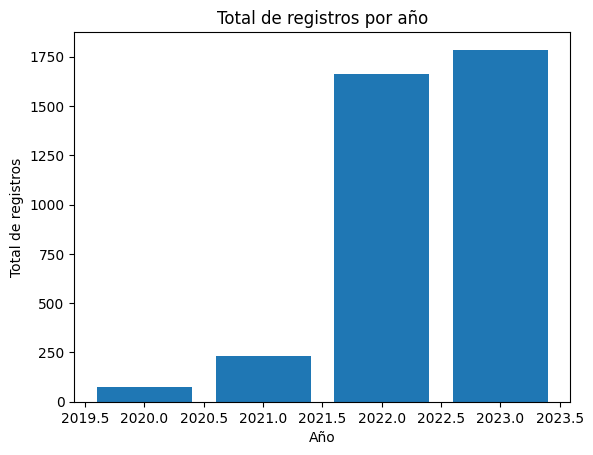

In [5]:
import matplotlib.pyplot as plt

plt.bar(years, year_weights)

plt.title("Total de registros por año")

plt.xlabel("Año")

plt.ylabel("Total de registros")

plt.show()

In [6]:
data["experience_level"].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [7]:
data["count"] = 1

counts = data.groupby("experience_level").count()["count"]

exp_levels = list(counts.index)
exp_level_weights = list(counts.values)

print(exp_levels)
print(exp_level_weights)

['EN', 'EX', 'MI', 'SE']
[320, 114, 805, 2516]


In [8]:
exp_level_weights[3] / sum(exp_level_weights) * 100

67.0039946737683

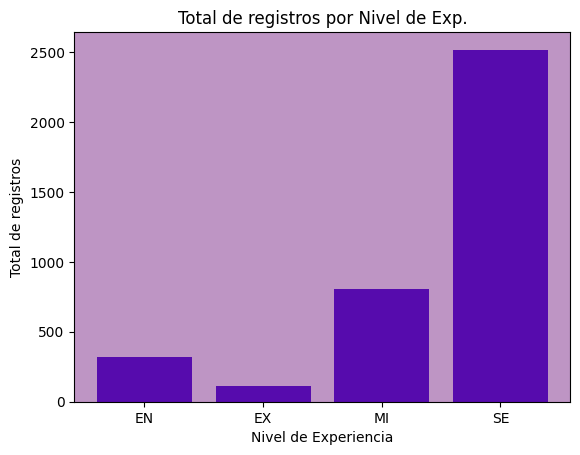

In [22]:
ax = plt.axes()
ax.set_facecolor("#be95c4")
plt.bar(exp_levels, exp_level_weights, color="#560bad")

plt.title("Total de registros por Nivel de Exp.")

plt.xlabel("Nivel de Experiencia")
plt.ylabel("Total de registros")

plt.show()

In [11]:
def viz_total_registros(columna):
    data["count"] = 1
    counts = data.groupby(columna).count()["count"]
    labels = list(counts.index)
    totals = list(counts.values)
    print("Labels=", labels)
    print("Totals=", totals)
    plt.bar(labels, totals)
    plt.title(f"Total de registros de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Total de registros")
    plt.show()
    return labels, totals

Labels= [2020, 2021, 2022, 2023]
Totals= [76, 230, 1664, 1785]


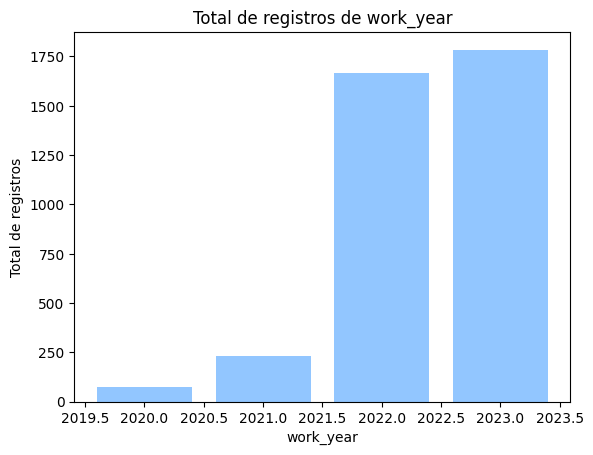

([2020, 2021, 2022, 2023], [76, 230, 1664, 1785])

In [12]:
viz_total_registros("work_year")

Labels= [2020, 2021, 2022, 2023]
Totals= [76, 230, 1664, 1785]


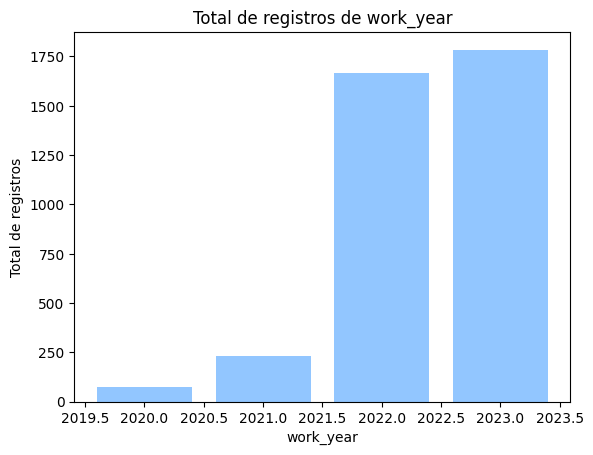

Labels= ['EN', 'EX', 'MI', 'SE']
Totals= [320, 114, 805, 2516]


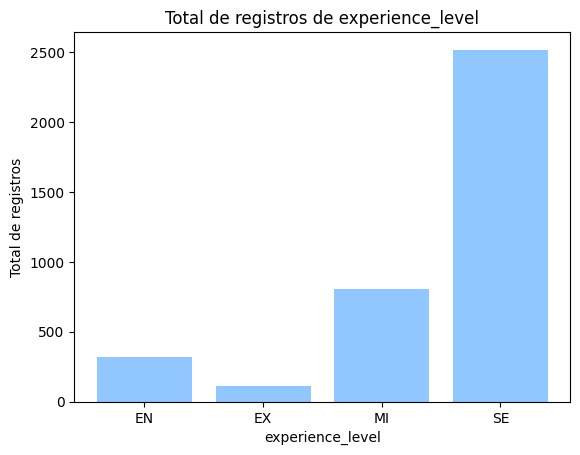

Labels= ['CT', 'FL', 'FT', 'PT']
Totals= [10, 10, 3718, 17]


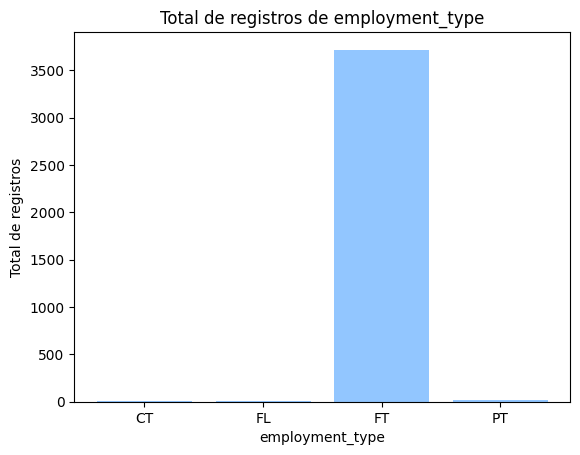

Labels= [0, 50, 100]
Totals= [1923, 189, 1643]


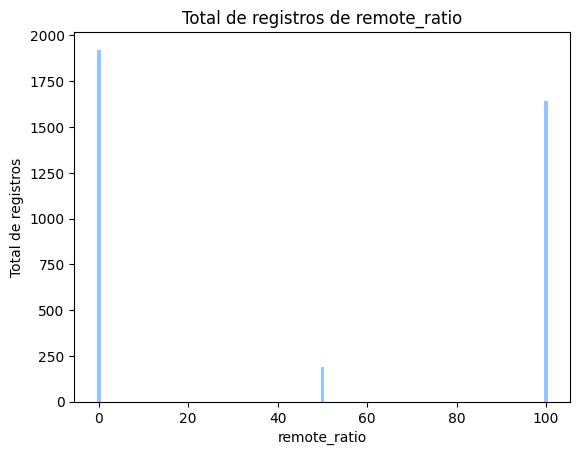

Labels= ['L', 'M', 'S']
Totals= [454, 3153, 148]


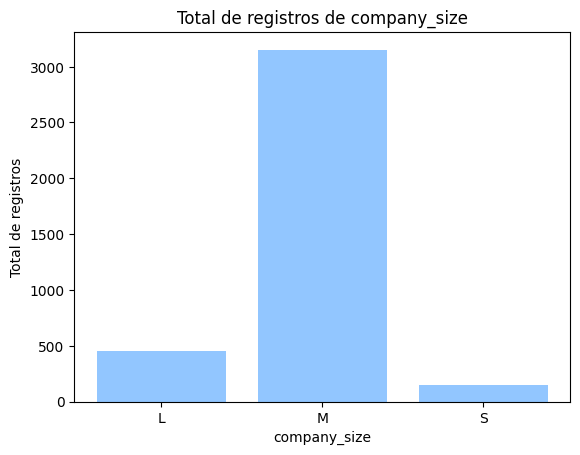

In [23]:
for columna in data.columns:
    if columna == "count":
        continue
    if len(data[columna].unique()) < 10:
        viz_total_registros(columna)

In [31]:
data_study = data.copy()

data_study = data_study[
    (data_study["work_year"] == 2022) |
     (data_study["work_year"] == 2023) ]

data_study = data_study[ (data_study["experience_level"] == "SE") ]

data_study = data_study[ (data_study["employment_type"] == "FT") ]

data_study = data_study[
    (data_study["remote_ratio"] == 0) |
     (data_study["remote_ratio"] == 100) ]

data_study = data_study[ (data_study["salary_currency"] == "USD") ]

data_study = data_study[ (data_study["company_size"] == "M") ]

data_study = data_study[ (data_study["employee_residence"] == "US") ]

data_study = data_study[["work_year", "job_title", "salary_in_usd", "remote_ratio"]]

data_study.sample(10)

,work_year,job_title,salary_in_usd,remote_ratio
226,2023,Data Engineer,185000,0
415,2023,Data Scientist,175000,100
2518,2022,Machine Learning Engineer,210000,100
3140,2022,Data Engineer,175000,100
2260,2022,Data Engineer,110000,100
2106,2022,Data Engineer,134760,100
1874,2022,Data Engineer,216000,100
1978,2022,Machine Learning Engineer,150000,100
2098,2022,Analytics Engineer,125000,100
2394,2022,Data Scientist,247500,0


## Fase 2 - Modelo de Aprendizaje

- Conjunto de Entrenamiento
- Conjunto de Pruebas
- Modelo de Clasificación/Regresión
- Ajuste/Entrenamiento
- Pruebas de Validación

In [32]:
len(data_study) / len(data) *100

55.233022636484684

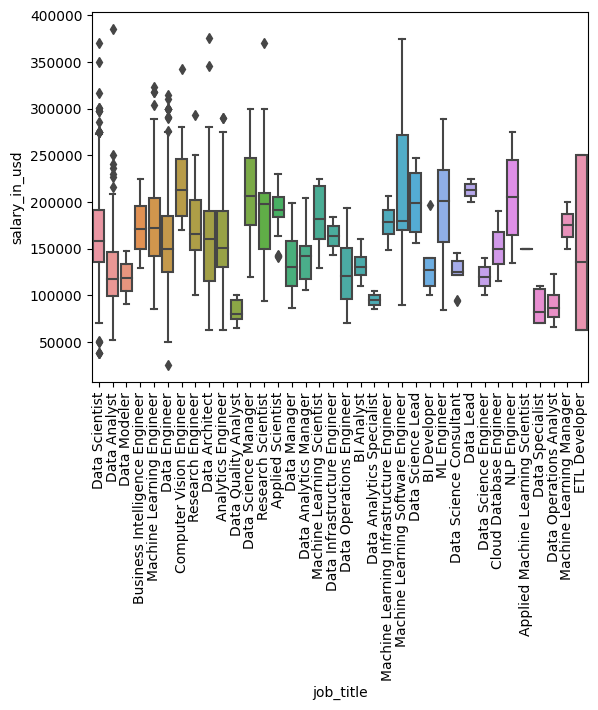

In [40]:
import seaborn as sns
#sns.boxplot(x = data_study["job_title"], y = data_study["salary_in_usd"])
sns.boxplot(x=data_study["job_title"], y=data_study["salary_in_usd"])
plt.xticks(rotation=90)
plt.show()

## Fase 3 - Reportes y Resultados

- Validación de Aprendizaje
- Generar gráficas de desempeño
- Reporte de Métricas